In [ ]:
# run(`conda create --channel conda-forge --channel bioconda --channel defaults --strict-channel-priority --name blast blast`)

In [31]:
import Pkg
pkgs = [
    "Revise",
    "DataFrames",
    "uCSV",
    "StatsPlots"
]
# Pkg.add(pkgs)
for pkg in pkgs
    eval(Meta.parse("import $pkg"))
end
import Mycelia

In [2]:
data_dir = joinpath(dirname(pwd()), "data")

"/oak/stanford/scg/lab_mpsnyder/cjprybol/Mycelia/projects/viral-exposome-discovery/data"

In [26]:
# total_memory = 64
# threads = max(1, Int(total_memory//8))

total_memory = 128
threads = max(1, Int(total_memory//16))

memory = Int(total_memory//threads)

16

In [4]:
blast_task = "megablast"

"megablast"

In [5]:
db = "nt"

"nt"

In [6]:
blastdbs_dir = mkpath(joinpath(homedir(), "workspace", "blastdbs"))

"/home/cjprybol/workspace/blastdbs"

In [7]:
blast_db = joinpath(blastdbs_dir, db)

"/home/cjprybol/workspace/blastdbs/nt"

In [ ]:
Mycelia.download_blast_db(db="nt", outdir=blastdbs_dir, source="ncbi", conda_env="blast")

In [ ]:
# load in metadata
metadata_dir = joinpath(dirname(pwd()), "metadata")

exposome_environmental_data = DataFrames.DataFrame(uCSV.read(
    joinpath(metadata_dir, "metadata_exposome.rds.tsv"),
    delim='\t',
    header=1,
    typedetectrows=300
))

joint_sample_metadata = DataFrames.DataFrame(uCSV.read(
    joinpath(metadata_dir, "exposome/joint_sample_metadata.tsv"),
    delim='\t',
    header=1,
    typedetectrows=300
))

@assert joint_sample_metadata[!, "Library Name"] == joint_sample_metadata[!, "LibraryName"]

joint_metadata = DataFrames.innerjoin(
    joint_sample_metadata,
    exposome_environmental_data,
    on="Library Name" => "samplenames")

run_ids = sort(joint_metadata[!, "Run"])

sample_paths = joinpath.(data_dir, "SRA", run_ids)

In [ ]:
# sample_paths = filter(x -> !occursin(".ipynb_checkpoints", x), readdir(joinpath(data_dir, "SRA"), join=true))
# sample_paths = filter(x -> isfile(joinpath.(x, "megahit", "final.contigs.fastg.gfa.fna")), sample_paths)

In [ ]:
# find the small outliers on output size and run again

In [30]:
file_sizes = []
for sample_path in sample_paths[1:end]
    sample = basename(sample_path)
    blastn_directory = mkpath(joinpath(sample_path, "blastn"))
    assembled_fasta = joinpath(sample_path, "megahit", "final.contigs.fastg.gfa.fna")
    target_outfile = joinpath(blastn_directory, basename(assembled_fasta) * ".blastn.$(db).$(blast_task).txt")
    # --mem=$(memory)G
    if isfile(target_outfile)
            # @show sample, filesize(target_outfile)
        push!(file_sizes, filesize(target_outfile))
    else
        @show sample
    end

    # cmd = "julia $(homedir())/workspace/Mycelia/scripts/run-blastn.jl --fasta $(assembled_fasta) --blast_db $(blast_db) --task $(blast_task) --out_directory $(blastn_directory) --threads $(threads)"
    # submission = 
    # `sbatch 
    # --mail-user=cameron.prybol@gmail.com
    # --mail-type=ALL
    # --error=%x-%j.err
    # --output=%x-%j.out
    # --partition=batch
    # --account=mpsnyder
    # --nodes=1
    # --ntasks=1
    # --time=1-00:00:00    
    # --cpus-per-task=$(threads)
    # --mem-per-cpu=$(memory)G
    # --job-name=blastn
    # --wrap $cmd
    # `
    # run(submission)
    # end
end
# count(file_sizes .== 0)

75

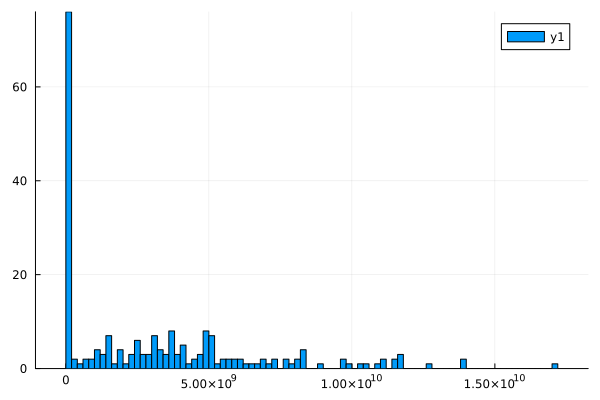

In [36]:
StatsPlots.histogram(file_sizes, nbins=80)

In [ ]:
# findlast(sample_path -> !isempty(readdir(joinpath(sample_path, "blastn"))), sample_paths)

In [ ]:
# sample_paths = filter(x -> !occursin(".ipynb_checkpoints", x), readdir(joinpath(data_dir, "SRA"), join=true))
# sample_paths = filter(x -> isfile(joinpath(x, "megahit", "final.contigs.fastg.gfa.fna")), sample_paths)

# for sample_path in sample_paths
#     sample = basename(sample_path)
#     blastn_directory = joinpath(sample_path, "blastn")
#     @show readdir(blastn_directory)
#     target_outfile = joinpath(sample_path, "blastn", "final.contigs.fastg.gfa.fna.blastn.nt.$(blast_task).txt")
#     # || filesize(target_outfile) == 0
#     if !isfile(target_outfile) 
#         assembled_fasta = joinpath(sample_path, "megahit", "final.contigs.fastg.gfa.fna")
#         cmd = "julia $(homedir())/workspace/Mycelia/scripts/run-blastn.jl --fasta $(assembled_fasta) --blast_db nt --task $(blast_task) --out_directory $(blastn_directory) --threads $(threads)"
#         submission = 
#         `sbatch 
#         --mail-user=cameron.prybol@gmail.com
#         --mail-type=ALL
#         --error=%x-%j.err
#         --output=%x-%j.out
#         --partition=batch
#         --account=mpsnyder
#         --nodes=1
#         --ntasks=1
#         --time=1-00:00:00    
#         --cpus-per-task=$(threads)
#         --mem=$(memory)G
#         --job-name=blastn
#         --wrap $cmd
#         `
#         run(submission)
#         # end
#     end
# end